<a href="https://colab.research.google.com/github/AhmadRafif22/PCVK_Genap_2023/blob/main/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STUDI KASUS : Mencerahkan Sebuah Citra dengan menggunakan metode histogram equialization dan linear brightness

In [ ]:
from google.colab import drive

#Accesing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

## Gambar Awal

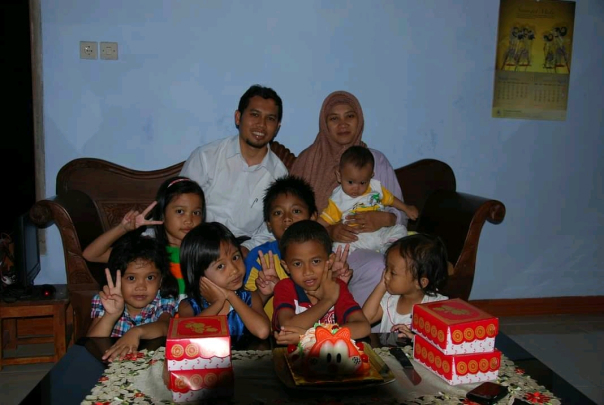

In [ ]:
image_ori = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/lain lain/PVCK/UTS/rafif.jpg')
cv2_imshow(image_ori)

## Mencerahkan Gambar Menggunakan Metode Histrogram Equalization

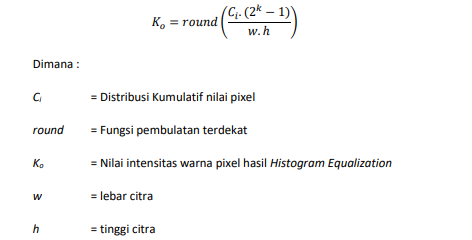

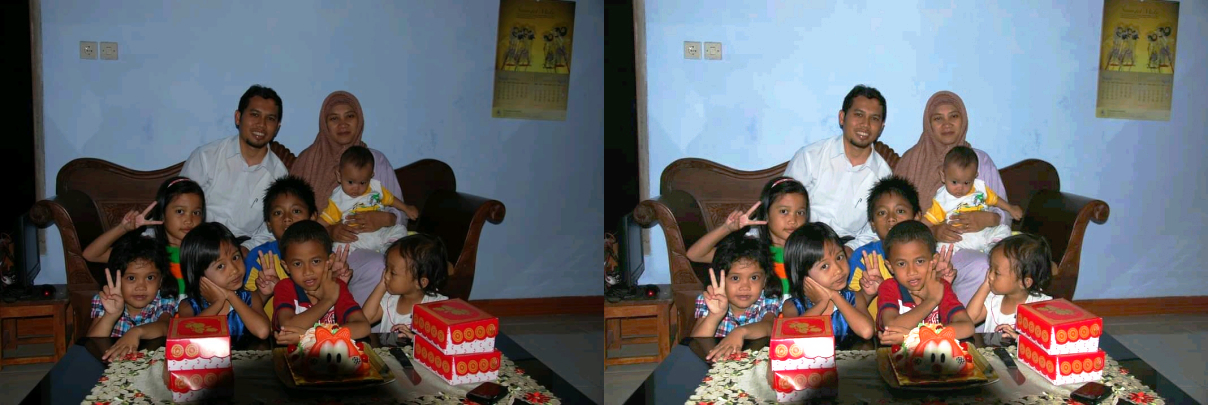

<BarContainer object of 256 artists>

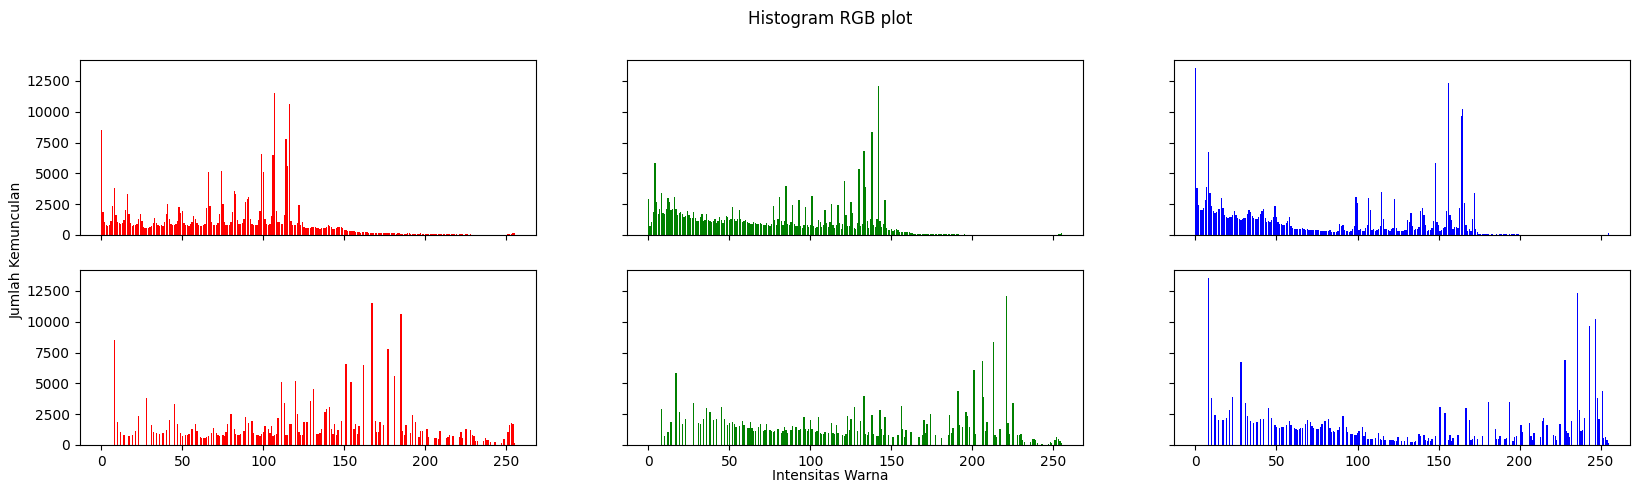

In [ ]:
# input citra
image_ori = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/lain lain/PVCK/UTS/rafif.jpg') 

# make histogram function
def histogram(img):
  height, width, depth = np.shape(img) 
  ax = np.zeros((3,256)) 
  for y in range(0,height) : 
    for x in range(0,width) :
      ax[0][img[y][x][0]] += 1 
      ax[1][img[y][x][1]] += 1
      ax[2][img[y][x][2]] += 1 
  return ax

ori = histogram(image_ori)

#convert to Numpy array 
img_array = np.asarray(image_ori)

#Step 1: Normalized cumulative histogram
#flatten image array and calculate histogram via binning 
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize 
num_pixels = np. sum(histogram_array) 
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram 
chistogram_array = np.cumsum(histogram_array)

#Step 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#Step 3: Transformation
# flatten image array into 10 list 
img_list = list(img_array.flatten())

# transform pixel values to equalize 
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array 
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape) 
new_image_ori = eq_img_array

equal_histo = histogram(new_image_ori)

final_frame = cv.hconcat((image_ori, new_image_ori)) #concatenate image
cv2_imshow(final_frame)

fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True) 
fig.suptitle('Histogram RGB plot') 
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center') 
axs[0,0].bar(np.arange(256), ori[2], color='red') 
axs[0,1].bar(np.arange(256), ori[1], color='green') 
axs[0,2].bar(np.arange(256), ori[0], color='blue') 
axs[1,0].bar(np.arange(256), equal_histo[2], color='red') 
axs[1,1].bar(np.arange(256), equal_histo[1], color='green')
axs[1,2].bar(np.arange(256), equal_histo[0], color='blue') 


## Mencerahkan Citra Menggunakan Metode Linear Brightness

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 25


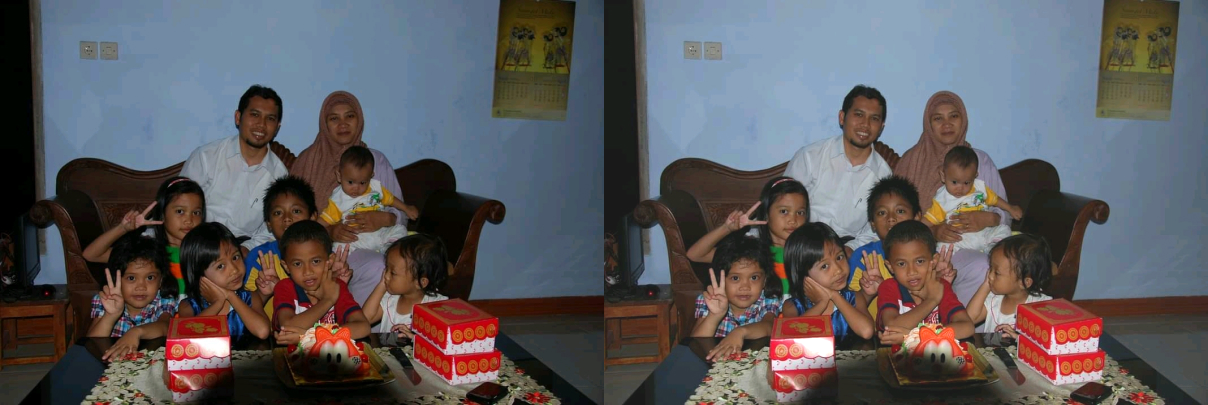

In [ ]:
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/lain lain/PVCK/UTS/rafif.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

## Perbandingan Output

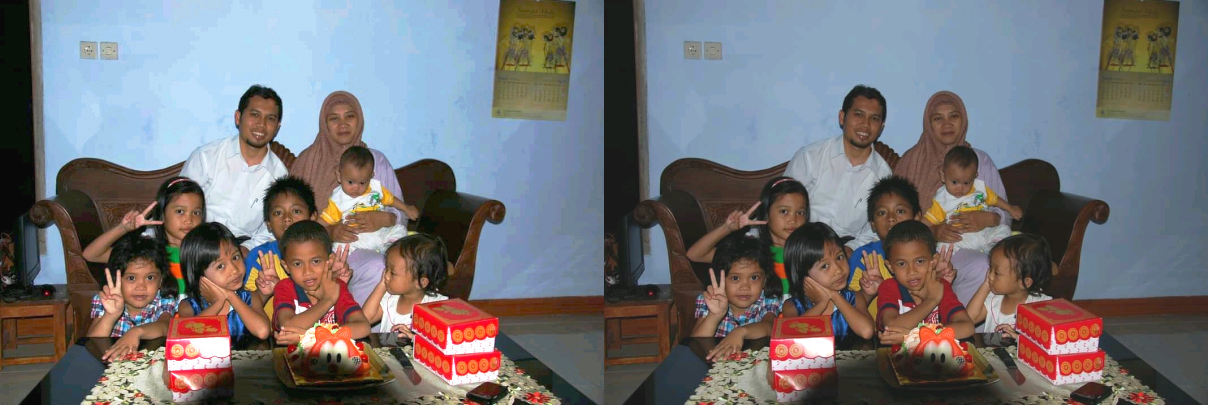

In [ ]:
perbandingan = cv.hconcat((new_image_ori, brightness_image))
cv2_imshow(perbandingan)